## Support Vector Machines and more

This exercise can be attempted in R or Python. The solution and hints are in R, though.

**Outline**
- Recap of logistic regression
- Poission regression model
- Example of SVMs
- Exercises
- Extra Resources


**Poisson regression**

Poisson regression, also known as a log-linear model that is used when your outcome variable is a count. Examples of count variables in research include how many heart attacks or strokes one has had, how many days in the past month one’s used [insert your favorite illicit substance here], or, as in survival analysis, how many days from outbreak until infection. The Poisson distribution is unique in that its mean and its variance are equal. This is often due to zero inflation. Sometimes two processes may be at work: one that determines whether or not an event happens at all and another that determines how many times the event happens when it does. Using our count variables from above, this could be a sample that contains individuals with and without heart disease: those without heart disease cause a disproportionate amount of zeros in the data and those with heart disease trail off in a tail to the right with increasing amounts of heart attacks. This is why logistic and Poisson regressions go together in research: there is a dichotomous outcome inherent in a Poisson distribution. However, the “hits” in the logistic question can’t be understood without further conducting the Poisson regression.

**Support Vector Machines/ Classification**

Support-vector machines are supervised learning models that analyse data used for classification and regression analysis.
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence. 
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane, etc.


## Data
This tutorial will use the Framingham dataset, which you should be familiar with by now.

**Cleaning the data**

Same as last time: remove NaNs, change the categorical variables to factors and remove outliers that are beyond 1.5 * IQR of cholestorol and glucose. If you want to try, you can create 10 year interval categories for the age column.

**Scaling the data**

In general, SVM classifers work better when the data is in the same magnitude. The main advantage of standardizing is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical difficulties during the calculation. Because kernel values usually depend on the inner products of feature vectors, e.g. the linear kernel and the polynomial kernel, large attribute values might cause numerical problems. 

Don't forget to use the train mean/std to standardize your train and test set. 


**Balancing the data**

By attempting the exercises below, you will find out that our dataset needs some balancing. We will be using the ```ovun.sample``` function of the R library(ROSE). More infos later.. https://www.rdocumentation.org/packages/ROSE/versions/0.0-3/topics/ovun.sample


Let's go!

#### A) Preprocess the data, remove outliers and NaNs

As we already did in our last tutorial (Week 2), please preprocess the data by changing the variables to factors, removing NaNs and outliers. You could add the age as 10 year interval categorical variable.

In [7]:
library(ggplot2)
library(tidyverse)
library(caTools)
library(dplyr)
library(e1071)
library(GGally)
library(ROCR)

library(sjPlot)
#library(sjlabelled)
#library(sjmisc)

library(pROC)


── Attaching packages ───────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [500]:
## Read in comma seperated Framingham file

df <- read.csv("framingham.csv")

##### i) Create train and test splits of the dataset (75/25)

Create a train and test dataset.

### B) Modelling

##### i) Recap: Fit a logistic regression of the development of coronary heart disease within 10 years and all other variables.

##### a. What's the probability of ten year CHD?

##### b. Make predictions based on the test set

##### c. Create a confusion matrix and plot the ROC curve

 ##### ii) Fit a Poisson logistic regression of the count of cigarettes and all other variables.
 
Poisson regression is similar to regular multiple regression except that the dependent (Y) variable is an observed
count that follows the Poisson distribution. Thus, the possible values of Y are the non-negative integers: 0, 1, 2, 3, and so on. It is assumed that large counts are rare. Hence, Poisson regression is similar to logistic regression, which also has a discrete response variable. However, the response is not limited to specific values as it is in logistic regression. 

Hint: use ```family  = poisson(link = "log")``` in your GLM model. 

##### a. Make predictions based on the test set and calculate the mean average error (MAE)

#### iii) Support Vector Machine (SVM): Classification


Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

    - Effective in high dimensional spaces.
    - Still effective in cases where number of dimensions is greater than the number of samples.
    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
    - If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
    - SVMs do not directly provide probability estimates, these can be calculated using an expensive five-fold cross-validation.


Run the code below to create an example dataset with two classes (-1 and +1) for demonstration purposes. The code shows how the hyperplane can devide the dataset for SVM classification.

In [8]:
set.seed(1)
x = matrix(rnorm(20*2), ncol=2)
class = c(rep(-1,10), rep(1,10))
x[class == 1,] = x[class == 1,] + 1

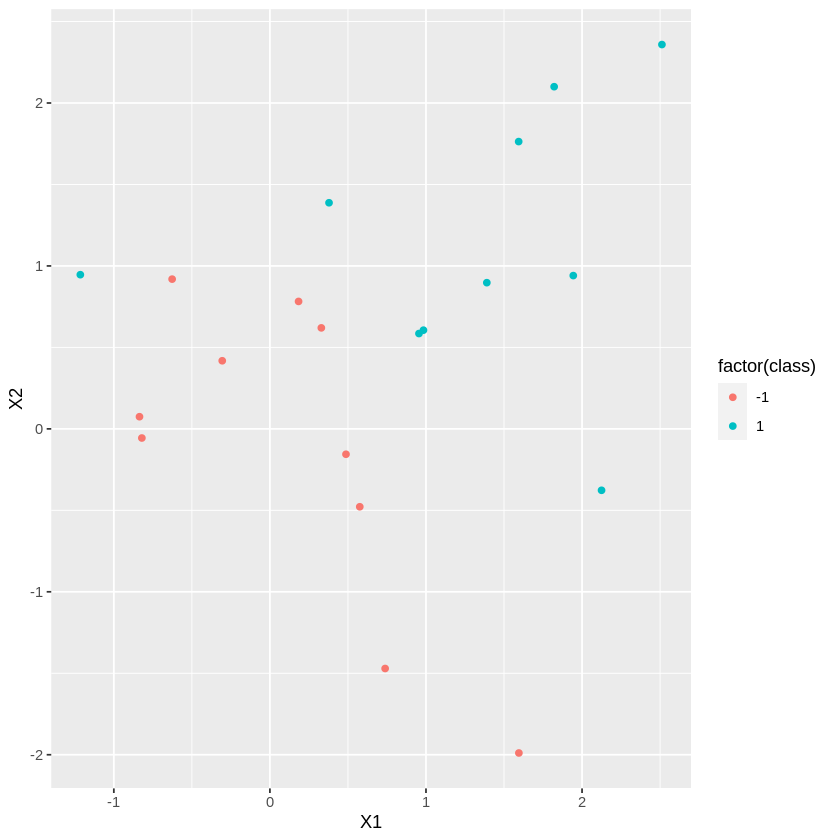

In [9]:
ggplot(data.frame(x), aes(X1, X2, colour = factor(class))) +
  geom_point()

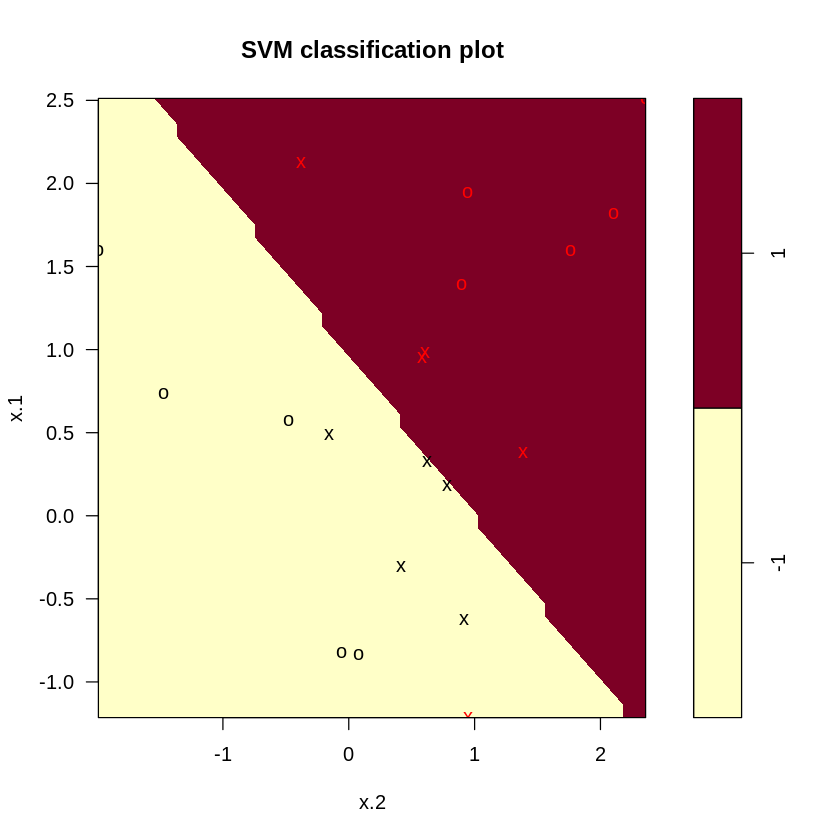

In [10]:
training_data = data.frame(x = x, class = as.factor(class))

# Fit Support Vector Machine model to data set
svmfit <- svm(class~., data = training_data, kernel = "linear", scale = FALSE)
# Plot Results
plot(svmfit, training_data)

The region of feature space that will be assigned to the −1 class is shown in light yellow, and the region that will be assigned to the +1 class is shown in dark red. The decision boundary between the two classes is linear (because we used the argument kernel = "linear"), though due to the way in which the plotting function is implemented in this library the decision boundary looks somewhat jagged in the plot. (Note also that the second feature is plotted on the x-axis and the first feature is plotted on the y-axis, in contrast to the behavior of the usual plot() function in R.)

The support vectors are plotted as crosses and the remaining observations are plotted as circles; we see here that there are 10 support vectors. We can determine their identities as follows:

In [11]:
svmfit$index

[1]  1  2  5  7 10 13 14 15 16 17

To obtain a summaryy of the classifier we can use following command:

In [287]:
summary(svmfit)


Call:
svm(formula = class ~ ., data = training_data, kernel = "linear", 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  10

 ( 5 5 )


Number of Classes:  2 

Levels: 
 -1 1




In order to fit an SVM using a non-linear kernel, we once again use the svm() function. However, now we use a different value of the parameter kernel. To fit an SVM with a polynomial kernel we use ```kernel="polynomial"```, and to fit an SVM with a radial kernel we use ```kernel="radial"```. In the former case we also use the degree argument to specify a degree for the polynomial kernel, and in the latter case we use gamma to specify a value of  γ  for the radial basis kernel.

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. (https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

Let's fit the same test data to a SVM classifier with 'radial' kernel.

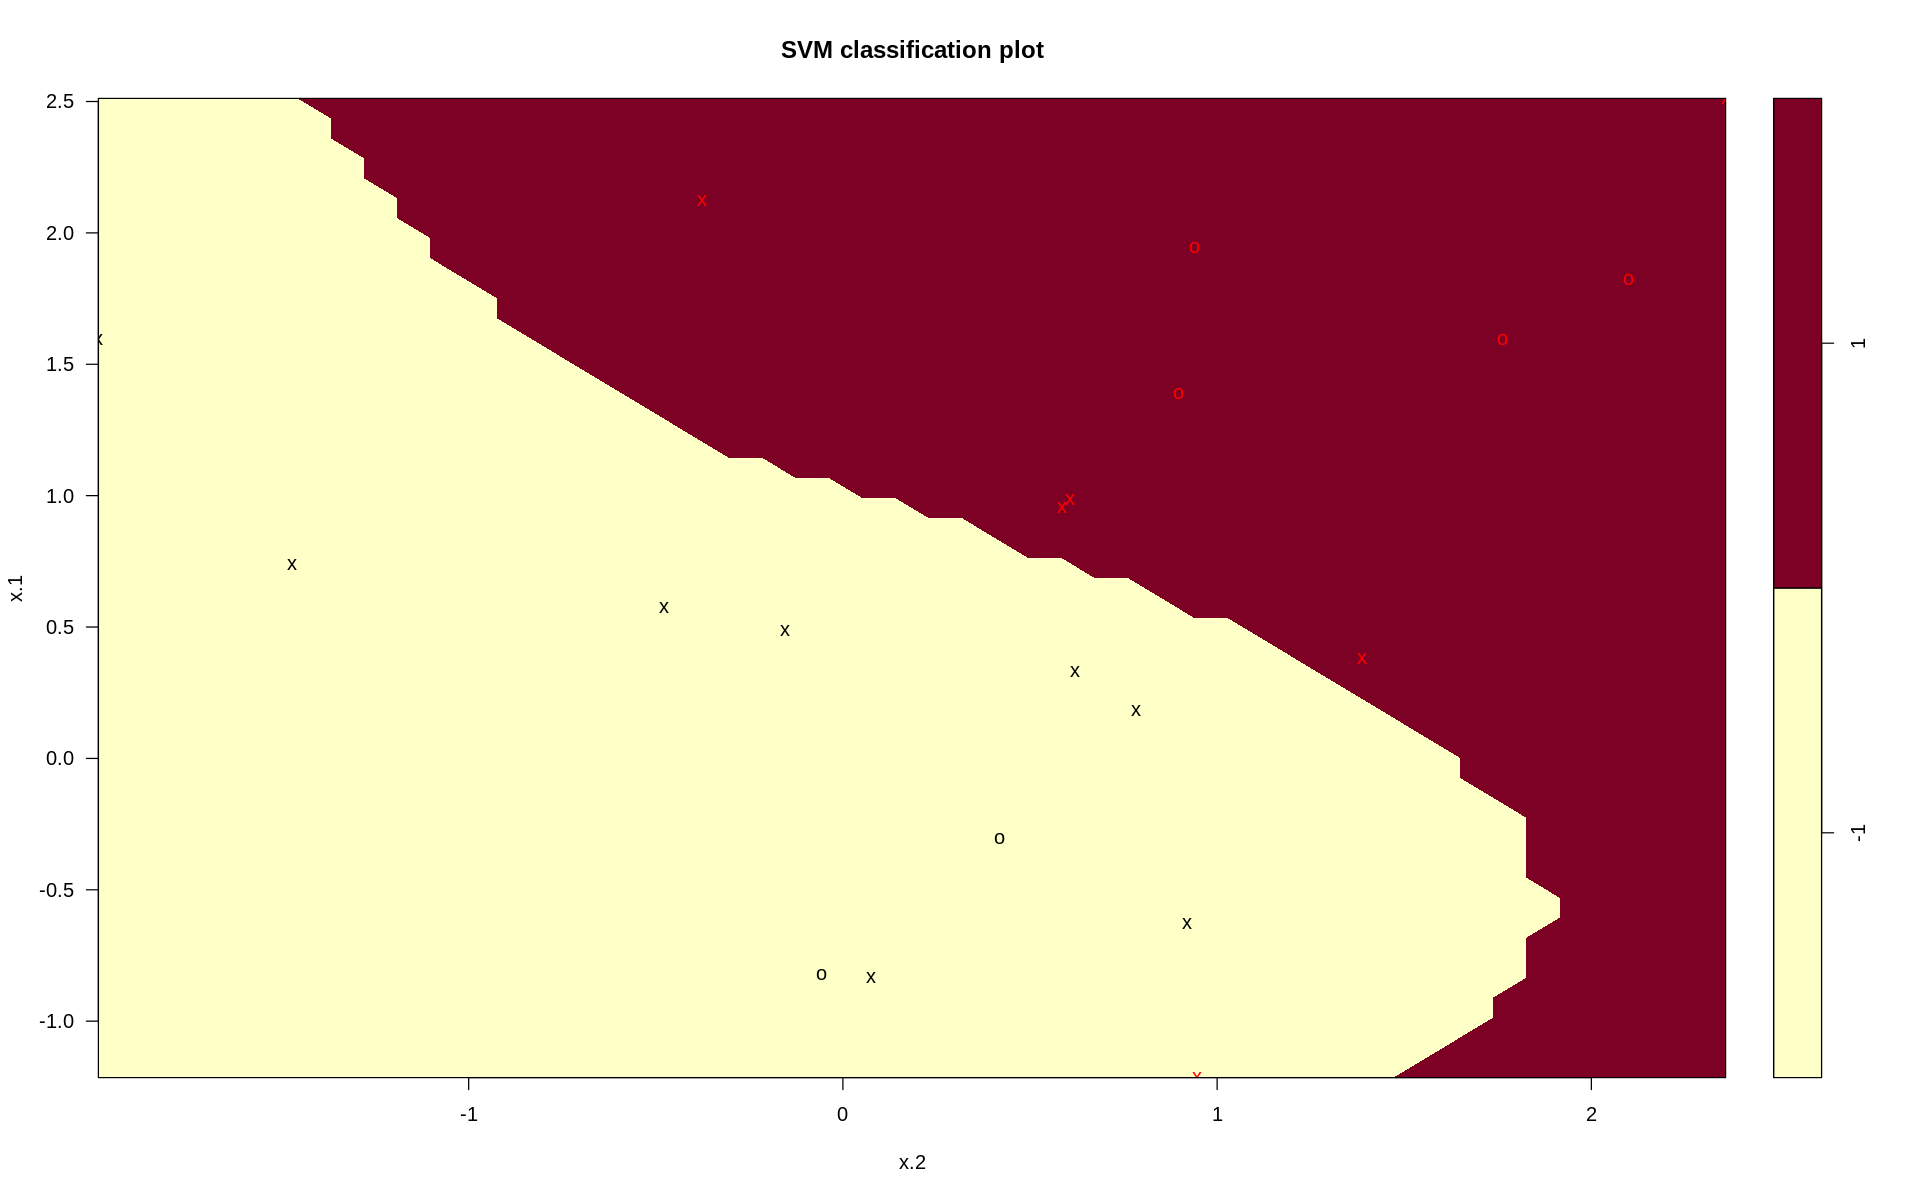

In [288]:
# Fit Support Vector Machine model to data set
svmfit <- svm(class~., data = training_data, kernel = "radial", scale = FALSE)
# Plot Results
plot(svmfit, training_data)

Here we can clearly see the non-linear nature of the hyperplane that devides the two classes.

### SVMs and Framingham data

Let's try to create a SVM classifier for our Framingham dataset. In general, SVM classifers work better when the data is in the same magnitude. The main advantage of standarization is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. 

#### Split the dataframe into train/test (75/25 %) 

##### Standardize the columns: cigsPerDay, totChol, diaBP, sysBP, BMI, heartRate, glucose (Hint: use the train mean/std for scaling the test data)

##### a. Create a SVM to predict coronary heart disease from glucose and diaBP.

##### b. Get the parameters of the hyperplane of your linear SVM model (w and b of the decision boundary defined as $w^Tx+b=0$, where w is the feature weight vector of the support vectors and b is the bias.

##### c. How would you define the hyperplane in our  2D model (a model with two variables: x1, x2)?

##### d. Create a svm plot with glucose and diabolic blood pressure as x and y axis

Describe the plot? Why do you think this happened?

#### d.I EXTRA:  Plot bar plot of counts of TenYearCHD. Are they balanced?

#### e. Balance the dataset 
Hint: use the library(ROSE) to oversample the training set 


##### f. Now create a new SVM classifier, but this time with a 'radial' kernel and plot again

##### g. Try a 'sigmoid' kernel to the model and plot again

What's the difference between the kernels? Describe the plots.

#### Soft margins and class weights

In this soft margin SVM, data points on the incorrect side of the margin boundary have a penalty that increases with the distance from it. As we are trying to reduce the number of misclassications, a sensible way to adapt our objective function $\frac{1}{2}\|w\|^2$, is to minimise
$\frac{1}{2}\|w\|^2 + C \sum_i \xi_i$
obyeing the relaxed restrictions, where C controls the trade-off between the slack variable penalty and the size of the margin. A value C much larger than 0 converges to the original SVM algorithm. Unfortunately the optimal value of C must come from trial and error.

An important variant is when we consider one type of error more costly than the other (say, in a medical test for cancer, we prefer a false positive than a false negative, since in the later a sick patient will go untreated). To solve it, we assign different costs to each class:
$\frac{1}{2}\|w\|^2 + C_+ \sum_{i_+} \xi_i + C_- \sum_{i_-} \xi_i$

where $i_$ are the indexes where $y_i=−1$, and $i_+$ for $y_i=+1$.

This is done at R’s ```svm()``` with option ```class.weights```.

In [622]:
costs <- table(train$TenYearCHD)  # the weight vector must be named with the names of the classes
costs[1] <- 1e10 # a class -1 mismatch has a terrible cost
costs[2] <- 1    # a class +1 mismatch not so much...
costs


   No   Yes 
1e+10 1e+00 

##### h. Add the costs as class.weights to the previous model

##### i. Finally, create the same models as we did with the two variables, but this time include all variables.

In real life, we would always include all the data we have (especially if it's such a relatively small dataset).These exercises were just illustrative so you could see what these SVM plots with hyperplanes would look like.

#### i. Tune the models with different kernels to find the best hyperparameters (Hint: the ```tune.svm``` function might help you here)
#### i. Re-run the models with the best hyperparameters

### iv) Model prediction

##### a. Make predictions on the test set with all models

##### b. Create confusion matrices for all models

##### c. Print accuracy, sensitivity and specificity of all models

##### d. Plot the ROC curves for all models

##### e. Comment on the models. How does the SVM classification compare to the logistic regression in this case?

#### References/Additional reading

- Poisson regression: 
    * https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958 (python)

    * Further examples: https://stats.idre.ucla.edu/r/dae/poisson-regression/

- SVMs: 
    * https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
    * 1An Idiot’s guide to support vector machines (SVMs): http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

    * https://scikit-learn.org/stable/modules/svm.html (python)
    
    * Datacamp: https://www.datacamp.com/courses/support-vector-machines-in-r (R)
